# Tennis match prediction and playing strategy -- Data cleaning and wrangling

## Goal
1. Download data from [data hub](https://datahub.io/sports-data/atp-world-tour-tennis-data#data-cli) and [github](https://github.com/JeffSackmann/tennis_slam_pointbypoint)
2. Perform data cleaning and wrangling
    * extract useful information from each table
    * cleaning redundant rows that are not useful 
3. Prepare training and testing set for future modeling:
    * Traditional machine learning(Logistic regression, KNN, Decision tree...etc.)
    * Deep learning

### Importing useful packages

In [207]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# set the dataframe displaying format
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# supress warnings
import warnings
warnings.filterwarnings("ignore")

sns.set()
sns.set_style("whitegrid")

In this notebook, we will use the web scrapped data online from year 1991 to 2017, there are multiple csv files and one of the goals here is to clean and merge those data for future analysis and modeling

### Loading data

In [208]:
scores_1991_2016_raw = pd.read_csv('../Data/scores_1991_2016.csv')
scores_2017_raw = pd.read_csv('../Data/scores_2017.csv')
stats_1991_2016_raw = pd.read_csv('../Data/stats_1991_2016.csv')
stats_2017_raw = pd.read_csv('../Data/stats_2017.csv')
tournament = pd.read_csv('../Data/tournament.csv')
rank = pd.read_csv('../Data/ranking.csv')

In [209]:
# check the size of each raw data
print(scores_1991_2016_raw.shape)
print(scores_2017_raw.shape)
print(stats_1991_2016_raw.shape)
print(stats_2017_raw.shape)

(95359, 24)
(3830, 24)
(91956, 53)
(3811, 53)


We can see that the size of our data varies quite a bit, this is due to the year span from 1991 to 2016(total 26 years) as opposed to 2017 has its own, the stats data has all the detail match statistics and the score data more focus on the information of the match, we will first try to merge 1991-2016 and 2017 together since the column number is the same, before doing so, let's double check if all the columns match with each other

In [210]:
# check if the column name and order matches
print((scores_1991_2016_raw.columns != scores_2017_raw.columns).sum())
print((stats_1991_2016_raw.columns != stats_2017_raw.columns).sum())

0
0


Since they both equals zero, which implies the columns are exactly the same

In [211]:
# merging data
scores_raw = pd.concat([scores_1991_2016_raw, scores_2017_raw], axis=0)
stats_raw = pd.concat([stats_1991_2016_raw, stats_2017_raw], axis=0)

We will check the columns of score first

In [212]:
display(scores_raw.head())
print(scores_raw.columns)

,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,loser_name,loser_player_id,loser_slug,winner_seed,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix
0,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Finals,1,1,Nicklas Kulti,k181,nicklas-kulti,Michael Stich,s351,michael-stich,NaN,6,63 16 62,2,1,13,11,0,0,1991-7308-k181-s351,/en/scores/1991/7308/MS001/match-stats
1,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Semi-Finals,2,1,Michael Stich,s351,michael-stich,Jim Courier,c243,jim-courier,6,2,64 76(6),2,0,13,10,1,0,1991-7308-s351-c243,/en/scores/1991/7308/MS003/match-stats
2,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Semi-Finals,2,2,Nicklas Kulti,k181,nicklas-kulti,Magnus Larsson,l206,magnus-larsson,NaN,NaN,75 64,2,0,13,9,0,0,1991-7308-k181-l206,/en/scores/1991/7308/MS002/match-stats
3,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Quarter-Finals,3,1,Jim Courier,c243,jim-courier,Martin Sinner,s367,martin-sinner,2,Q,76(3) 63,2,0,13,9,1,0,1991-7308-c243-s367,/en/scores/1991/7308/MS007/match-stats
4,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Quarter-Finals,3,2,Michael Stich,s351,michael-stich,Jimmy Arias,a031,jimmy-arias,6,NaN,36 63 63,2,1,15,12,0,0,1991-7308-s351-a031,/en/scores/1991/7308/MS006/match-stats


Index(['tourney_year_id', 'tourney_order', 'tourney_slug', 'tourney_url_suffix', 'tourney_round_name', 'round_order', 'match_order', 'winner_name', 'winner_player_id', 'winner_slug', 'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed', 'loser_seed', 'match_score_tiebreaks', 'winner_sets_won', 'loser_sets_won', 'winner_games_won', 'loser_games_won', 'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_id', 'match_stats_url_suffix'], dtype='object')


Next we will drop some unecessary columns that will not provide any help for our prediction model, let us show the number of unique values in each column

In [213]:
# show the number of unique values
display(scores_raw.nunique())

tourney_year_id            1949
tourney_order                92
tourney_slug                127
tourney_url_suffix         1949
tourney_round_name           12
round_order                  10
match_order                  64
winner_name                2071
winner_player_id           2065
winner_slug                2066
loser_name                 3553
loser_player_id            3548
loser_slug                 3546
winner_seed                  67
loser_seed                   68
match_score_tiebreaks     12083
winner_sets_won               5
loser_sets_won                4
winner_games_won             36
loser_games_won              34
winner_tiebreaks_won          4
loser_tiebreaks_won           3
match_id                  99175
match_stats_url_suffix    95620
dtype: int64

Based on the unique value observation and domain knowledge, we will first drop the following columns:
 * `tourney_slug`: tournament name, not useful
 * `tourney_url_suffix`: url, not useful
 * `winner_slug`: similar to `winner_player_id`, no need to keep
 * `loser_slug`: same reason as above
 * `match_stats_url_suffix`: url, not useful

In [214]:
col_drop = ['tourney_slug', 'tourney_url_suffix', 'winner_slug', 'loser_slug', 
            'match_stats_url_suffix']
scores_raw.drop(col_drop, axis=1, inplace=True)

Next we will check the data type and number of missing values in each column

In [215]:
scores_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99189 entries, 0 to 3829
Data columns (total 19 columns):
tourney_year_id          99189 non-null object
tourney_order            99189 non-null int64
tourney_round_name       99189 non-null object
round_order              99189 non-null int64
match_order              99189 non-null int64
winner_name              99189 non-null object
winner_player_id         99189 non-null object
loser_name               99189 non-null object
loser_player_id          99189 non-null object
winner_seed              57373 non-null object
loser_seed               45231 non-null object
match_score_tiebreaks    99187 non-null object
winner_sets_won          99189 non-null int64
loser_sets_won           99189 non-null int64
winner_games_won         99189 non-null int64
loser_games_won          99189 non-null int64
winner_tiebreaks_won     99189 non-null int64
loser_tiebreaks_won      99189 non-null int64
match_id                 99189 non-null object
dtypes: 

In [216]:
# show number of missing value in each column
scores_raw.isnull().sum()

tourney_year_id              0
tourney_order                0
tourney_round_name           0
round_order                  0
match_order                  0
winner_name                  0
winner_player_id             0
loser_name                   0
loser_player_id              0
winner_seed              41816
loser_seed               53958
match_score_tiebreaks        2
winner_sets_won              0
loser_sets_won               0
winner_games_won             0
loser_games_won              0
winner_tiebreaks_won         0
loser_tiebreaks_won          0
match_id                     0
dtype: int64

### Dealing with missing value

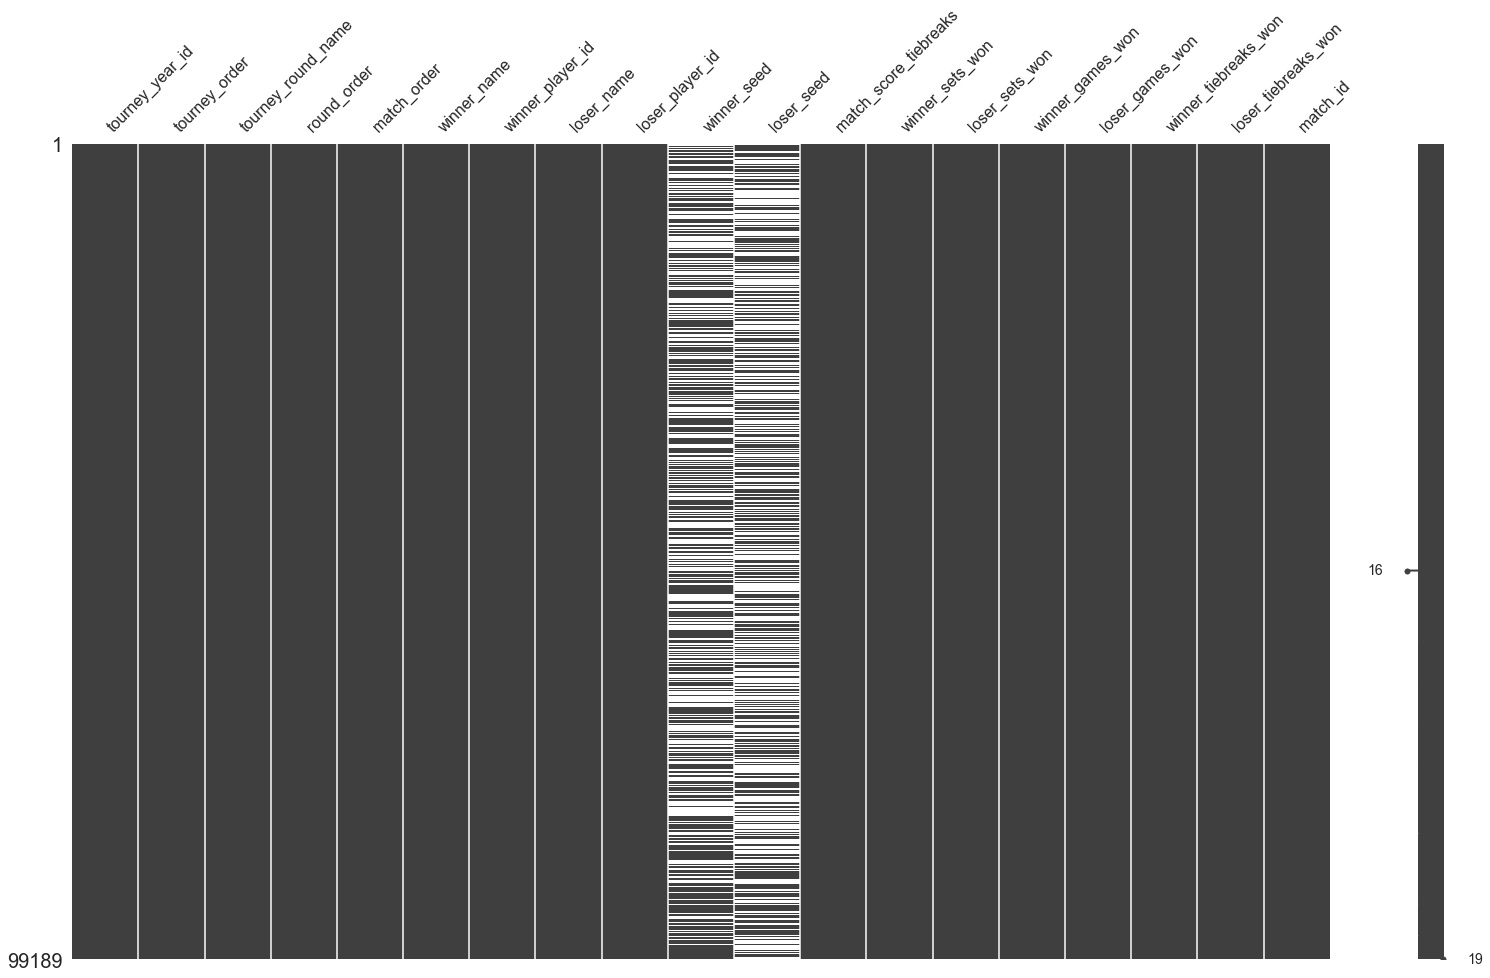

In [217]:
# show the distribution of missing values
import missingno as msno

msno.matrix(scores_raw, figsize=(25,15))
plt.show()

Since the data is listed in chronical order, the missing value only appears in `winner_seed` and `loser_seed` columns(2 in `match_score_tiebreaks` column), it seems randomly distributed, and in fact, the missing value could be easily explained: in each tournament, there are always seed players and un-seeded player, the seed number basically reflects the world ranking compare to other players in the same tournament, the higher the ranking, the lower the seed number, this is to make sure seed players will not encounter in early rounds since this will highly affect the ticket sales and how tense the match will be played. After all, we do not want to see the top 2 player in the world play against each other in first round, we are much willing to see them in the final. The number of seeds are always less than the nubmer of players in the tournament, it is usually 8, 16, or 32, depends on the scale of the tournament. Thus there will left most of the players in the tournament unseeded, thus having missing values in the seed column. 

### Rank vs seed
As we described above, the number of seed basically reflects players ranking at that time, since most of the players are unseeded players in a certain tournament and it is difficult to infer a player's ranking from this data since the only information we get is the player's rank is not high enough to get seeded, we could drop the row with missing values, but this will lost most of our examples. Another thing we could do is to dig out both players ranking in a certain match at that week, this will not only provide more accurate information than the seed number, but could also potentially improve our future model prediction.

The `scores_raw` data does not provide information of player's ranking at the moment, we need other two data `tournament` and `rank` to dig out the ranking information, since those three are relational tables, they share some identical features that could help us find the information we are looking for, before doing so, let us drop the seed columns since it will be redundant if we have the ranking information.

In [218]:
# drop winner_seed and loser_seed columns
scores_raw.drop(['winner_seed', 'loser_seed'], axis=1, inplace=True)

In [219]:
# keep only the rank and tournament since 1990
tour_since_1990 = tournament[tournament['tourney_year'] > 1989]
rank_since_1990 = rank[rank['week_year'] > 1989]

In [220]:
tour_since_1990.head()

,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_doubles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id,doubles_winner_1_name,doubles_winner_1_url,doubles_winner_1_player_slug,doubles_winner_1_player_id,doubles_winner_2_name,doubles_winner_2_url,doubles_winner_2_player_slug,doubles_winner_2_player_id,tourney_year_id
2060,1990,1,Adelaide,7308.0,adelaide,Adelaide,1990.01.01,1.0,1.0,32,32,Outdoor,Hard,"$150,000",/en/scores/archive/adelaide/7308/1990/results,Thomas Muster,/en/players/thomas-muster/m099/overview,thomas-muster,m099,Andrew Castle,/en/players/andrew-castle/c246/overview,andrew-castle,c246,Nduka Odizor,/en/players/nduka-odizor/o006/overview,nduka-odizor,o006,1990-7308
2061,1990,2,Wellington,354.0,wellington,Wellington,1990.01.01,1.0,1.0,32,32,Outdoor,Hard,"$150,000",/en/scores/archive/wellington/354/1990/results,Emilio Sanchez,/en/players/emilio-sanchez/s014/overview,emilio-sanchez,s014,Kelly Evernden,/en/players/kelly-evernden/e025/overview,kelly-evernden,e025,Nicolas Pereira,/en/players/nicolas-pereira/p218/overview,nicolas-pereira,p218,1990-354
2062,1990,3,Auckland,301.0,auckland,Auckland,1990.01.08,1.0,8.0,32,32,Outdoor,Hard,"$150,000",/en/scores/archive/auckland/301/1990/results,Scott Davis,/en/players/scott-davis/d004/overview,scott-davis,d004,Kelly Jones,/en/players/kelly-jones/j018/overview,kelly-jones,j018,Robert Van't Hof,/en/players/robert-vant-hof/v008/overview,robert-vant-hof,v008,1990-301
2063,1990,4,Sydney Outdoor,338.0,sydney,Sydney,1990.01.08,1.0,8.0,32,32,Outdoor,Hard,"$175,000",/en/scores/archive/sydney/338/1990/results,Yannick Noah,/en/players/yannick-noah/n022/overview,yannick-noah,n022,Pat Cash,/en/players/pat-cash/c023/overview,pat-cash,c023,Mark Kratzmann,/en/players/mark-kratzmann/k021/overview,mark-kratzmann,k021,1990-338
2064,1990,5,Australian Open,580.0,australian-open,Melbourne,1990.01.15,1.0,15.0,128,128,Outdoor,Hard,"$1,462,000",/en/scores/archive/australian-open/580/1990/re...,Ivan Lendl,/en/players/ivan-lendl/l018/overview,ivan-lendl,l018,Pieter Aldrich,/en/players/pieter-aldrich/a066/overview,pieter-aldrich,a066,Danie Visser,/en/players/danie-visser/v032/overview,danie-visser,v032,1990-580


We can see from the above table that `tour_since_1990` and `scores_raw` share a column name `tourney_year_id`, this could provide us the time information and further search for the ranking of both players in that match. We will first convert date column from both `tour_since_1990` and `rank_since_1990` using pd.to_datetime for furture use.

In [221]:
tour_since_1990['tourney_dates'] = pd.to_datetime(tour_since_1990['tourney_dates'])
rank_since_1990['week_title'] = pd.to_datetime(rank_since_1990['week_title'])

In [222]:
# define helper function to find winner rank in a certain match
def winner(row):
    
    # extract features from example
    tour_id = row['tourney_year_id']
    winner_id = row['winner_player_id']
    tour_date = tour_since_1990[tour_since_1990['tourney_year_id'] == tour_id] \
                .reset_index(drop=True).loc[0, 'tourney_dates'] # more robust representation
    
    
    # set a 7 days and 0 day timedelta for filtering purpose
    seven_d = pd.Timedelta(days=7)
    zero_d = pd.Timedelta(days=0)
    
    # filter particular player rank
    rank_winner = rank_since_1990[(rank_since_1990['player_id'] == winner_id)]
    
    # set condition to narrow down the correct ranking at the time
    condition1 = ((rank_winner['week_title'] - tour_date) < seven_d) 
    condition2 = ((rank_winner['week_title'] - tour_date) >= zero_d)
    
    # in case it could not find the ranking
    try:
        rank = rank_winner[condition1 & condition2].reset_index(drop=True).loc[0, 'rank_number']
    
        return rank
    
    except KeyError:
        
        return None
    
# define helper function to find loser rank in a certain match
def loser(row):
    
    # extract features from example
    tour_id = row['tourney_year_id']
    loser_id = row['loser_player_id']
    tour_date = tour_since_1990[tour_since_1990['tourney_year_id'] == tour_id] \
                .reset_index(drop=True).loc[0, 'tourney_dates'] # more robust representation
    
    
    # set a 7 days and 0 day timedelta for filtering purpose
    seven_d = pd.Timedelta(days=7)
    zero_d = pd.Timedelta(days=0)
    
    # filter particular player rank
    rank_loser = rank_since_1990[rank_since_1990['player_id'] == loser_id]

    # set condition to narrow down the correct ranking at the time
    condition1 = ((rank_loser['week_title'] - tour_date) < seven_d) 
    condition2 = ((rank_loser['week_title'] - tour_date) >= zero_d)
    
    # in case it could not find the ranking
    try:
        rank = rank_loser[condition1 & condition2].reset_index(drop=True).loc[0, 'rank_number']
    
        return rank
    
    except KeyError:
        
        return None

The code below will take few hours to extract the ranking information of every match example, we have pre-ran the function showing above and save the result in another table `scores_raw`, will keep the same name here. We will also comment the code, uncomment it when necessary.

In [223]:
# apply helper function to create winner_ranking and loser_ranking at the moment of the match
#scores_raw['winner_ranking'] = scores_raw.apply(winner, axis=1)
#scores_raw['loser_ranking'] = scores_raw.apply(loser, axis=1)
#scores_raw.to_csv('../Data/scores_processed', index=False)

In [224]:
# re-load the processed data that incorporates ranking information
scores_raw = pd.read_csv('../Data/scores_raw.csv')

After we attach the ranking information of both winner and loser of that match, let us move the focus to `stats_raw` data

In [225]:
# show a few examples of stats_raw
display(stats_raw.head())

,tourney_order,match_id,match_stats_url_suffix,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
0,0,1991-7308-k181-l206,/en/scores/1991/7308/MS002/match-stats,01:20:00,80.0,3.0,0.0,0.0,65.0,29.0,46.0,12.0,19.0,0.0,2.0,41.0,65.0,12.0,36.0,20.0,33.0,4.0,7.0,11.0,11.0,32.0,69.0,73.0,134.0,1.0,0.0,36.0,69.0,24.0,36.0,13.0,33.0,3.0,7.0,37.0,69.0,17.0,46.0,7.0,19.0,2.0,2.0,11.0,11.0,24.0,65.0,61.0,134.0
1,0,1991-7308-k181-s351,/en/scores/1991/7308/MS001/match-stats,01:29:00,89.0,1.0,2.0,44.0,65.0,31.0,44.0,12.0,21.0,2.0,5.0,43.0,65.0,16.0,47.0,21.0,36.0,4.0,7.0,12.0,12.0,37.0,83.0,80.0,148.0,12.0,5.0,47.0,83.0,31.0,47.0,15.0,36.0,3.0,7.0,46.0,83.0,13.0,44.0,9.0,21.0,3.0,5.0,12.0,12.0,22.0,65.0,68.0,148.0
2,0,1991-7308-k181-s424,/en/scores/1991/7308/MS005/match-stats,00:55:00,55.0,0.0,1.0,17.0,36.0,11.0,17.0,13.0,19.0,1.0,3.0,24.0,36.0,15.0,29.0,19.0,25.0,7.0,10.0,7.0,8.0,34.0,54.0,58.0,90.0,2.0,2.0,29.0,54.0,14.0,29.0,6.0,25.0,3.0,10.0,20.0,54.0,6.0,17.0,6.0,19.0,2.0,3.0,8.0,7.0,12.0,36.0,32.0,90.0
3,0,1991-7308-a031-s331,/en/scores/1991/7308/MS013/match-stats,01:09:00,69.0,2.0,3.0,44.0,58.0,28.0,44.0,7.0,14.0,6.0,8.0,35.0,58.0,7.0,24.0,20.0,32.0,5.0,9.0,9.0,9.0,27.0,56.0,62.0,114.0,3.0,4.0,24.0,56.0,17.0,24.0,12.0,32.0,4.0,9.0,29.0,56.0,16.0,44.0,7.0,14.0,2.0,8.0,9.0,9.0,23.0,58.0,52.0,114.0
4,0,1991-7308-k030-w136,/en/scores/1991/7308/MS009/match-stats,01:29:00,89.0,6.0,3.0,37.0,71.0,25.0,37.0,19.0,34.0,1.0,3.0,44.0,71.0,16.0,36.0,16.0,28.0,5.0,10.0,10.0,10.0,32.0,64.0,76.0,135.0,4.0,2.0,36.0,64.0,20.0,36.0,12.0,28.0,5.0,10.0,32.0,64.0,12.0,37.0,15.0,34.0,2.0,3.0,10.0,10.0,27.0,71.0,59.0,135.0


In [226]:
# check the data type of each column
stats_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95767 entries, 0 to 3810
Data columns (total 53 columns):
tourney_order                       95767 non-null int64
match_id                            95767 non-null object
match_stats_url_suffix              95767 non-null object
match_time                          95617 non-null object
match_duration                      95617 non-null float64
winner_aces                         95617 non-null float64
winner_double_faults                95617 non-null float64
winner_first_serves_in              95617 non-null float64
winner_first_serves_total           95617 non-null float64
winner_first_serve_points_won       95617 non-null float64
winner_first_serve_points_total     95617 non-null float64
winner_second_serve_points_won      95617 non-null float64
winner_second_serve_points_total    95617 non-null float64
winner_break_points_saved           95617 non-null float64
winner_break_points_serve_total     95617 non-null float64
winner_servi

It looks like we have most of the columns with numerical values, this is no surprise since this is the stats for each match and most of the variables can be quantified, we will check the missing values next.

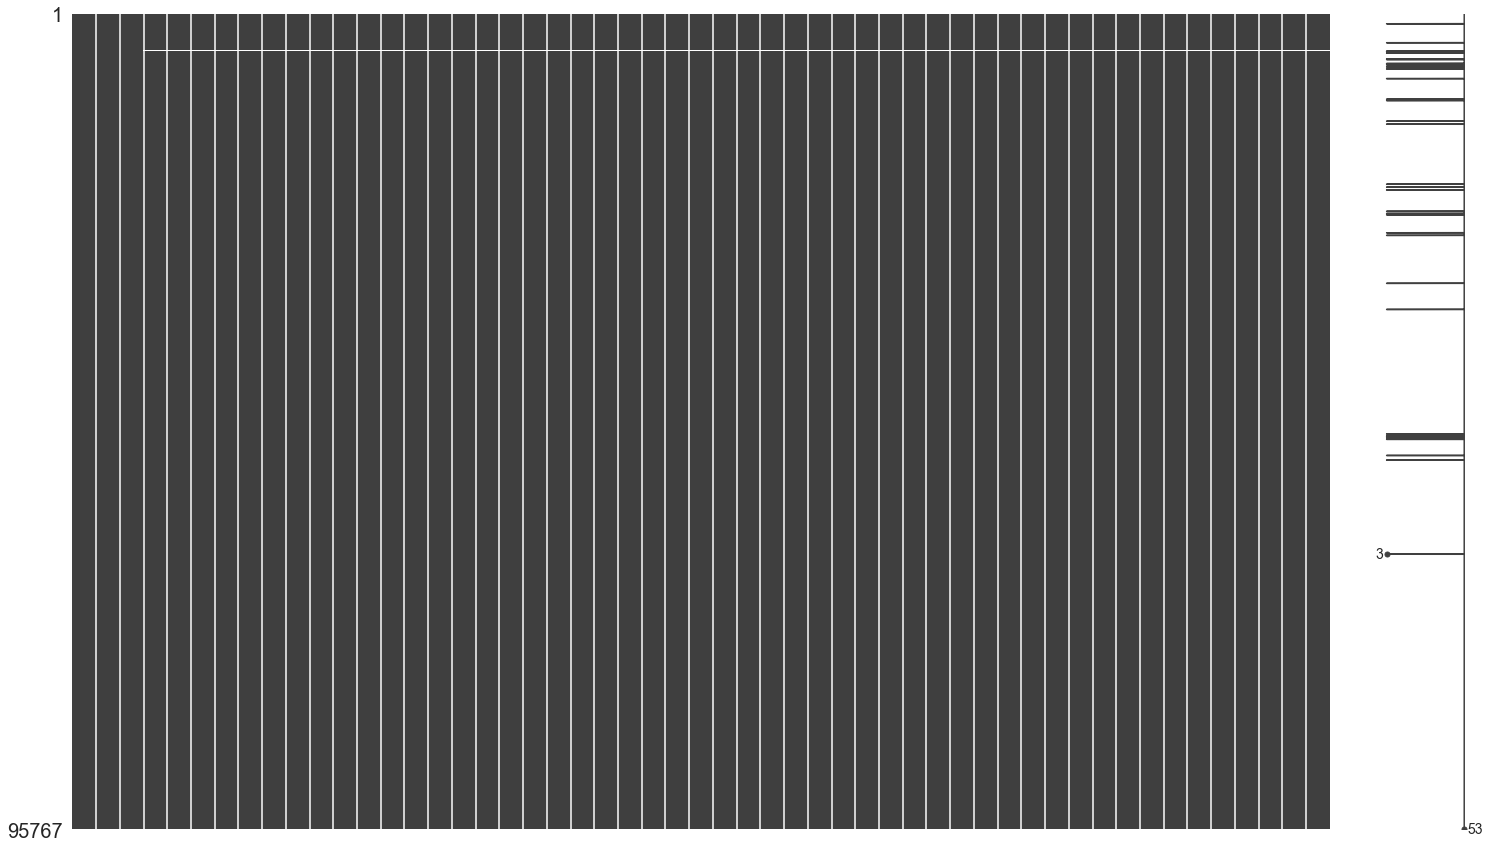

In [227]:
# check the distribution of missing values
msno.matrix(stats_raw, figsize=(25,15))
plt.show()

We can see that the location of missing values seems to align pretty well from column to column, this suggest that there are some examples that have most of the values missing, in this case, we could savely drop those examples since they almost did not provide any useful information.

In [228]:
# drop the rows with missing values
stats_raw.dropna(inplace=True)

Since most of the features will be useful for prediction model, we will only drop `match_stats_url_suffix` and `match_time`, the later is the same as the `match_duration` column.

In [229]:
stats_raw.drop(['match_stats_url_suffix', 'match_time'], axis=1, inplace=True)

### Prepare training and testing set

Our next step is to extract the information from `scores_raw` and find the matching stats in `stats_raw` and put them together to make features as well as label it for supervised learning. The following is the flow chart that better illustrate the process:

Since the `scores_raw` is already in chronical order, we will add the index column to help trace back the history if necessary 

In [230]:
scores_raw['index'] = list(range(1, len(scores_raw)+1))
scores_raw = scores_raw[['index'] + list(scores_raw.columns[:-1])].copy()
scores_raw.set_index(['match_id'], inplace=True)
stats_raw.set_index(['match_id'], inplace=True)

#### Active players vs none-active players
Professional tennis is a highly competitive world, if you do not train well and were not born with full of talents, there is a high chance to fail in the career, our next goal is to find out relatively inactive players and eliminate those rows, for example, if a certain player only play less than 20 matches in his whole ATP career, it is unlikely to provide much help in our predicting model. We have `scores_raw` that provides all the information of every match since 1991 to 2017, we will use it to get rid of some rows that those inactive player participate in.

In [231]:
# take another look of the scores_raw
scores_raw.head()

,index,tourney_year_id,tourney_order,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking
match_id,,,,,,,,,,,,,,,,,,,
1991-7308-k181-s351,1,1991-7308,1,Finals,1,1,Nicklas Kulti,k181,Michael Stich,s351,63 16 62,2,1,13,11,0,0,51.0,42.0
1991-7308-s351-c243,2,1991-7308,1,Semi-Finals,2,1,Michael Stich,s351,Jim Courier,c243,64 76(6),2,0,13,10,1,0,42.0,25.0
1991-7308-k181-l206,3,1991-7308,1,Semi-Finals,2,2,Nicklas Kulti,k181,Magnus Larsson,l206,75 64,2,0,13,9,0,0,51.0,56.0
1991-7308-c243-s367,4,1991-7308,1,Quarter-Finals,3,1,Jim Courier,c243,Martin Sinner,s367,76(3) 63,2,0,13,9,1,0,25.0,111.0
1991-7308-s351-a031,5,1991-7308,1,Quarter-Finals,3,2,Michael Stich,s351,Jimmy Arias,a031,36 63 63,2,1,15,12,0,0,42.0,60.0


In [232]:
scores_raw.shape

(99189, 19)

We can see that `winner_player_id` and `loser_player_id` provide information whether a certain player is playing in the match or not, we will utilize those two columns to all the id appearance in `scores_raw` data.

In [233]:
# use series.value_counts to see how many times a player win or lose a match, define a helper function
def eliminate(df, threshold=20):
    winning = df['winner_player_id'].value_counts()
    losing = df['loser_player_id'].value_counts()
    
    # set up the threshold, eliminate players if the winning matches or losing matches is lower than it
    winning_player = list(winning[winning < threshold].index)
    losing_player = list(losing[losing < threshold].index)
    
    eliminate_list = list(set(winning_player + losing_player))
    
    return eliminate_list

In [234]:
# we will use threshold of 20 first to eliminate some rows
match_20 = eliminate(scores_raw)
pattern = '|'.join(match_20)
scores_raw = scores_raw[~(scores_raw['winner_player_id'].str.contains(pattern)) \
           & ~(scores_raw['loser_player_id'].str.contains(pattern))]

In [235]:
# check the shape of scores_raw after processing
scores_raw.shape

(81148, 19)

We can see from above that we have eliminated around 17K examples, this is acceptable since those examples may not provide too much help to the model.

#### Cleaning redundant rows
Before moving further, one thing we have already noticed is the mismatching rows between `scores_raw` and `stats_raw`, which means some matches showing in `scores_raw` could not be found in `stats_raw` and vice versa. We will keep only the "overlapped" part so we would not encounter missing values in the example in further process.

In [236]:
index_keep = (set(scores_raw.index) & set(stats_raw.index))
scores_raw = scores_raw.loc[index_keep]
stats_raw = stats_raw.loc[index_keep]
print(f'There are {len(index_keep)} examples showing in both dataframe')

There are 78360 examples showing in both dataframe


In [237]:
# check the result
print(len(scores_raw))
print(len(stats_raw))

78371
78368


We can see that the number does not match between `scores_raw` and `stats_raw` and they are both larger than 95590, this implies that there are duplicated index, we will find out and clean it.

In [238]:
scores_index = scores_raw.index.value_counts()
stats_index = stats_raw.index.value_counts()
scores_duplicate = scores_index[scores_index > 1].index
stats_duplicate = stats_index[stats_index > 1].index

In [239]:
# check the duplicate in scores_raw
display(scores_raw.loc[scores_duplicate].sort_values(by='index').head())

,index,tourney_year_id,tourney_order,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking
match_id,,,,,,,,,,,,,,,,,,,
2001-605-h432-g379,36483,2001-605,70,Finals,1,1,Lleyton Hewitt,h432,Sebastien Grosjean,g379,63 63 64,3,0,18,10,0,0,2.0,7.0
2001-605-h432-g379,36496,2001-605,70,Round Robin,3,11,Lleyton Hewitt,h432,Sebastien Grosjean,g379,36 62 63,2,1,15,11,0,0,2.0,7.0
2003-605-f324-a092,42250,2003-605,68,Finals,1,1,Roger Federer,f324,Andre Agassi,a092,63 60 64,3,0,18,7,0,0,3.0,5.0
2003-605-f324-a092,42264,2003-605,68,Round Robin,3,12,Roger Federer,f324,Andre Agassi,a092,67(3) 63 76(7),2,1,19,16,1,1,3.0,5.0
2004-605-f324-h432,45217,2004-605,69,Finals,1,1,Roger Federer,f324,Lleyton Hewitt,h432,63 62,2,0,12,5,0,0,1.0,3.0


In [240]:
# check the duplicate in stats_raw
display(stats_raw.loc[stats_duplicate].head())

,tourney_order,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-520-p701-w522,30,191.0,13.0,4.0,100.0,149.0,75.0,100.0,27.0,49.0,9.0,10.0,102.0,149.0,25.0,91.0,24.0,45.0,4.0,12.0,23.0,22.0,49.0,136.0,151.0,285.0,19.0,2.0,91.0,136.0,66.0,91.0,21.0,45.0,8.0,12.0,87.0,136.0,25.0,100.0,22.0,49.0,1.0,10.0,22.0,23.0,47.0,149.0,134.0,285.0
2013-520-p701-w522,30,88.0,6.0,3.0,45.0,68.0,33.0,45.0,9.0,23.0,4.0,6.0,42.0,68.0,9.0,33.0,16.0,24.0,4.0,7.0,10.0,10.0,25.0,57.0,67.0,125.0,1.0,0.0,33.0,57.0,24.0,33.0,8.0,24.0,3.0,7.0,32.0,57.0,12.0,45.0,14.0,23.0,2.0,6.0,10.0,10.0,26.0,68.0,58.0,125.0
2009-306-c514-r383,30,102.0,2.0,4.0,30.0,47.0,29.0,30.0,7.0,17.0,0.0,0.0,36.0,47.0,20.0,50.0,21.0,36.0,3.0,14.0,9.0,8.0,41.0,86.0,77.0,133.0,1.0,7.0,50.0,86.0,30.0,50.0,15.0,36.0,11.0,14.0,45.0,86.0,1.0,30.0,10.0,17.0,0.0,0.0,8.0,9.0,11.0,47.0,56.0,133.0
2009-306-c514-r383,30,105.0,2.0,3.0,39.0,62.0,27.0,39.0,14.0,23.0,2.0,3.0,41.0,62.0,14.0,39.0,14.0,28.0,3.0,12.0,10.0,9.0,28.0,67.0,69.0,129.0,2.0,3.0,39.0,67.0,25.0,39.0,14.0,28.0,9.0,12.0,39.0,67.0,12.0,39.0,9.0,23.0,1.0,3.0,9.0,10.0,21.0,62.0,60.0,129.0
2008-605-d643-d402,66,103.0,4.0,3.0,34.0,55.0,25.0,34.0,14.0,21.0,3.0,4.0,39.0,55.0,11.0,31.0,22.0,35.0,4.0,11.0,10.0,9.0,33.0,66.0,72.0,121.0,5.0,1.0,31.0,66.0,20.0,31.0,13.0,35.0,7.0,11.0,33.0,66.0,9.0,34.0,7.0,21.0,1.0,4.0,9.0,10.0,16.0,55.0,49.0,121.0


From above, we can see that the duplicated index happened only when two players faced each other more than one time in the same tournament, this rarely happens but not impossible, for instance, the [ATP Finals](https://en.wikipedia.org/wiki/ATP_Finals) has so called `Robin rounds`, two players may face in the `Robin rounds` first and meet again later in the semi-final or final, in that case, we will keep the duplicate index since they are actually two different matches.

#### Define several helper functions
Since we have several tables in the dataset, we need some functions to extract some information from different tables and find out the relationship between tables and combine it together.

In [241]:
# define a helper function to help extract previous 10 matches from scores_raw
def previous_match_score(match_id, df=scores_raw, player='winner', player_1=1): # specify whether to extract the winner or loser of this match
    # find the match
    match = df.loc[[match_id]].copy()
    
    # find the match index, does not matter if there are more than one match with the same match_id
    idx = match.reset_index().loc[len(match)-1, 'index']
    
    # find winner of the match(the winner is actually unknown, since we will use the model to predict)
    if player == 'winner':
        player_id = match.reset_index().loc[0, 'winner_player_id']
    elif player == 'loser':
        player_id = match.reset_index().loc[0, 'loser_player_id']
    
    # track back the history of all match that the winner has played previously
    scores_player = df[((df['winner_player_id'] == player_id) \
                               | (df['loser_player_id'] == player_id)) & (df['index'] < idx)]
    
    # add another column for the winner of the match we want to predict(correct label) 
    
    if player == 'winner' and player_1:
        scores_player['actual_player_id'] = player_id
        scores_player['label'] = 1
    elif player == 'loser'and player_1:
        scores_player['actual_player_id'] = player_id
        scores_player['label'] = 0
    else:
        scores_player['actual_player_id'] = player_id
        
    if len(scores_player) < 10: # if the number of matches we could trace back is less than 10, we will skip it
        
        pass
    else:
        return scores_player.sort_values(by='index').iloc[-10:] # only take the recent 10 matches

In [242]:
# once we have our previoius 10 matches, define helper function to trace back the match stats in stats_raw of that match
def previous_match_stats(df, player='player_1'): # df has to be processed from previous_match_scores
    match_id = df.index
    
    player_id = df.reset_index().loc[0, 'actual_player_id']
    
    
    # return stats of previous ten matches, in case there are duplicate indices, drop those
    ten_stats = stats_raw.loc[match_id].drop_duplicates().copy()
    #print(ten_stats.shape[0])
    # get the index column to sort it out by index later
    #print(df.shape[0])
    ten_stats['index'] = df['index']
    
    winner_col = [w for w in ten_stats.columns if 'winner' in w]
    loser_col = [l for l in ten_stats.columns if 'loser' in l]
    winner_loser_col = []
    loser_winner_col = []
    
    # prepare relative stats, both winner stats - loser stats and loser stats - winner stats
    for i in range(len(winner_col)-1): # no need for the last col
        ten_stats[f'{winner_col[i]}-{loser_col[i]}'] = ten_stats[winner_col[i]] - ten_stats[loser_col[i]]
        winner_loser_col.append(f'{winner_col[i]}-{loser_col[i]}')
    for i in range(len(winner_col)-1):   
        ten_stats[f'{loser_col[i]}-{winner_col[i]}'] = ten_stats[loser_col[i]] - ten_stats[winner_col[i]]
        loser_winner_col.append(f'{loser_col[i]}-{winner_col[i]}')
        
    as_winner_df = df[df['winner_player_id'] == player_id]
    as_loser_df = df[df['loser_player_id'] == player_id]
    
    
    if len(as_winner_df) > 0:
        winner_match_id = as_winner_df.index
        ten_stats_winner = ten_stats.loc[winner_match_id, \
                                        ['index', 'match_duration'] + winner_col + winner_loser_col]
        ten_stats_winner['win'] = 1
     
           
    if len(as_loser_df) > 0:
        loser_match_id = as_loser_df.index
        ten_stats_loser = ten_stats.loc[loser_match_id,   \
                                       ['index', 'match_duration'] + loser_col + loser_winner_col]
        ten_stats_loser['win'] = 0
    
    
    
    
    try:
    # make new column names for player1 stats
        player_col = list(ten_stats_winner[winner_col].columns.str.replace('winner', player))
    
    # make new column names for player1 relative stats with opponents of that match
        relative_player_col = list(ten_stats_winner[winner_col].columns[:-1] \
                                .str.replace('winner', f'relative_{player}'))
    except: # in case ten_stats_winner is not assigned(if player did not win any of previous 10 matches)
        player_col = list(ten_stats_loser[loser_col].columns.str.replace('loser', player))
        relative_player_col = list(ten_stats_loser[loser_col].columns[:-1] \
                                .str.replace('loser', f'relative_{player}'))
    
    
    final_col = ['index', f'{player}_match_duration'] + player_col + relative_player_col + [f'{player}_win']
    
    # change the original columns name to new column name so they match each other
    if len(as_winner_df) > 0 and len(as_loser_df) > 0:
        ten_stats_winner.columns = final_col
        ten_stats_loser.columns = final_col
        final_df = pd.concat([ten_stats_winner, ten_stats_loser]).sort_values(by='index')
    elif len(as_winner_df) > 0:
        ten_stats_winner.columns = final_col
        final_df = ten_stats_winner.sort_values(by='index')
    else:
        ten_stats_loser.columns = final_col
        final_df = ten_stats_loser.sort_values(by='index')
    
    
    
    
    return final_df

In [243]:
# define function to extract score information from previous 10 matches
def previous_match_score_process(df, player='player_1', label=1): # use the df from previous_match_score
    temp_df = df.copy()
    
    player_id = temp_df.reset_index().loc[0, 'actual_player_id']
   
    winner_col = ['winner_sets_won', 'winner_games_won', 'winner_tiebreaks_won', 'winner_ranking']
    loser_col = ['loser_sets_won', 'loser_games_won', 'loser_tiebreaks_won', 'loser_ranking']
    
    winner_loser_col = []
    loser_winner_col = []
       
    # prepare relative stats, both winner stats - loser stats and loser stats - winner stats
    for i in range(len(winner_col)): 
        temp_df[f'{winner_col[i]}-{loser_col[i]}'] = temp_df[winner_col[i]] - temp_df[loser_col[i]]
        winner_loser_col.append(f'{winner_col[i]}-{loser_col[i]}')
    for i in range(len(winner_col)):   
        temp_df[f'{loser_col[i]}-{winner_col[i]}'] = temp_df[loser_col[i]] - temp_df[winner_col[i]]
        loser_winner_col.append(f'{loser_col[i]}-{winner_col[i]}')
    
    as_winner_df = temp_df[temp_df['winner_player_id'] == player_id]
    as_loser_df = temp_df[temp_df['loser_player_id'] == player_id]
    
    
    # extract column name
    if len(as_winner_df) > 0 and len(as_loser_df) > 0:
        as_winner_df.drop(['tourney_year_id', 'tourney_order', 'tourney_round_name', 'winner_name', 
                           'winner_player_id','loser_name', 'loser_player_id', 'match_score_tiebreaks'] \
                            + loser_col + loser_winner_col, axis=1, inplace=True)
        as_loser_df.drop(['tourney_year_id', 'tourney_order', 'tourney_round_name', 'winner_name', 
                          'winner_player_id','loser_name', 'loser_player_id', 'match_score_tiebreaks'] \
                            + winner_col + winner_loser_col, axis=1, inplace=True)
        
        # prepare columns for final df
        player_col = list(as_winner_df[winner_col].columns.str.replace('winner', player))
        relative_player_col = list(as_winner_df[winner_col].columns.str.replace('winner', f'relative_{player}'))
    
    elif len(as_winner_df) > 0:
        as_winner_df.drop(['tourney_year_id', 'tourney_order', 'tourney_round_name', 'winner_name', 
                           'winner_player_id','loser_name', 'loser_player_id', 'match_score_tiebreaks'] \
                            + loser_col + loser_winner_col, axis=1, inplace=True)
        
        player_col = list(as_winner_df[winner_col].columns.str.replace('winner', player))
        relative_player_col = list(as_winner_df[winner_col].columns.str.replace('winner', f'relative_{player}'))
    elif len(as_loser_df) > 0:
        as_loser_df.drop(['tourney_year_id', 'tourney_order', 'tourney_round_name', 'winner_name', 
                          'winner_player_id','loser_name', 'loser_player_id', 'match_score_tiebreaks'] \
                            + winner_col + winner_loser_col, axis=1, inplace=True)
        player_col = list(as_loser_df[loser_col].columns.str.replace('loser', player))
        relative_player_col = list(as_loser_df[loser_col].columns.str.replace('loser', f'relative_{player}'))
    
    # check if there is label column
    if label:
        final_col = ['index'] + list(f'{player}_' + as_winner_df.columns[1:3]) + player_col \
                    + ['actual_player_id', 'label'] + relative_player_col
    else:
        final_col = ['index'] + list(f'{player}_' + as_winner_df.columns[1:3]) + player_col \
                    + ['actual_player_id'] + relative_player_col
    
    if len(as_winner_df) > 0 and len(as_loser_df) > 0:
        as_winner_df.columns = final_col
        as_loser_df.columns = final_col
        final_df = pd.concat([as_winner_df, as_loser_df]).sort_values(by='index')
    elif len(as_winner_df) > 0:
        as_winner_df.columns = final_col
        final_df = as_winner_df.sort_values(by='index')
    elif len(as_loser_df) > 0:
        as_loser_df.columns = final_col
        final_df = as_loser_df.sort_values(by='index')
    
    
    # make another player_id column to be consistent with other column
    final_df[f'{player}_id'] = final_df['actual_player_id'].copy()
    final_df.drop(['actual_player_id'], axis=1, inplace=True)
    
    return final_df

#### Testing funciton with one example
We had made several functions so far, let us pick a random match and test the function and see whether the output is expected.

In [244]:
# pick a random match from scores_raw
np.random.seed(109)
scores_raw.sample()

,index,tourney_year_id,tourney_order,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking
match_id,,,,,,,,,,,,,,,,,,,
2014-418-l797-l575,85841,2014-418,47,Round of 32,5,15,Lukas Lacko,l797,Yen-Hsun Lu,l575,61 64,2,0,12,5,0,0,91.0,42.0


We have the `match_id` "2009-418-f316-l290", this will be used to feed the `previous_match_score` function, we will also specify the player using the "winner" in this match and whether this player would be player 1 or not, we did this because our future model would be built on whether player 1 will win the match or not.

In [245]:
random_match_score = previous_match_score('2010-1536-l397-h472', player='winner', player_1=1)

We can see from above the previous ten mathces of the information of the "winner" was extracted, we will then feed them to `previous_match_stats` and `previous_match_score_process` function, we will specify it as `player_1`.

In [246]:
random_match_stats = previous_match_stats(random_match_score)
random_match_stats

,index,player_1_match_duration,player_1_aces,player_1_double_faults,player_1_first_serves_in,player_1_first_serves_total,player_1_first_serve_points_won,player_1_first_serve_points_total,player_1_second_serve_points_won,player_1_second_serve_points_total,player_1_break_points_saved,player_1_break_points_serve_total,player_1_service_points_won,player_1_service_points_total,player_1_first_serve_return_won,player_1_first_serve_return_total,player_1_second_serve_return_won,player_1_second_serve_return_total,player_1_break_points_converted,player_1_break_points_return_total,player_1_service_games_played,player_1_return_games_played,player_1_return_points_won,player_1_return_points_total,player_1_total_points_won,player_1_total_points_total,relative_player_1_aces,relative_player_1_double_faults,relative_player_1_first_serves_in,relative_player_1_first_serves_total,relative_player_1_first_serve_points_won,relative_player_1_first_serve_points_total,relative_player_1_second_serve_points_won,relative_player_1_second_serve_points_total,relative_player_1_break_points_saved,relative_player_1_break_points_serve_total,relative_player_1_service_points_won,relative_player_1_service_points_total,relative_player_1_first_serve_return_won,relative_player_1_first_serve_return_total,relative_player_1_second_serve_return_won,relative_player_1_second_serve_return_total,relative_player_1_break_points_converted,relative_player_1_break_points_return_total,relative_player_1_service_games_played,relative_player_1_return_games_played,relative_player_1_return_points_won,relative_player_1_return_points_total,relative_player_1_total_points_won,player_1_win
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-403-f339-l397,66006,90.0,9.0,5.0,35.0,76.0,25.0,35.0,19.0,41.0,11.0,13.0,44.0,76.0,6.0,37.0,8.0,23.0,0.0,2.0,10.0,11.0,14.0,60.0,58.0,136.0,2.0,4.0,-2.0,16.0,-6.0,-2.0,4.0,18.0,9.0,11.0,-2.0,16.0,-4.0,2.0,-14.0,-18.0,-2.0,-11.0,-1.0,1.0,-18.0,-16.0,-20.0,0
2010-403-l397-b678,66035,99.0,6.0,3.0,37.0,71.0,31.0,37.0,16.0,34.0,0.0,2.0,47.0,71.0,16.0,58.0,15.0,21.0,3.0,9.0,12.0,12.0,31.0,79.0,78.0,150.0,0.0,-5.0,-21.0,-8.0,-11.0,-21.0,10.0,13.0,-6.0,-7.0,-1.0,-8.0,10.0,21.0,-3.0,-13.0,1.0,7.0,0.0,0.0,7.0,8.0,6.0,1
2010-410-ba47-l397,66246,65.0,1.0,4.0,20.0,45.0,11.0,20.0,9.0,25.0,2.0,7.0,20.0,45.0,5.0,26.0,6.0,16.0,1.0,1.0,8.0,8.0,11.0,42.0,31.0,87.0,-6.0,1.0,-6.0,3.0,-10.0,-6.0,-1.0,9.0,2.0,6.0,-11.0,3.0,-4.0,6.0,-10.0,-9.0,-4.0,-6.0,0.0,0.0,-14.0,-3.0,-25.0,0
2010-425-sa49-l397,66297,58.0,3.0,1.0,28.0,48.0,19.0,28.0,8.0,20.0,0.0,3.0,27.0,48.0,3.0,25.0,8.0,24.0,0.0,0.0,8.0,9.0,11.0,49.0,38.0,97.0,-8.0,-1.0,3.0,-1.0,-3.0,3.0,-8.0,-4.0,0.0,3.0,-11.0,-1.0,-6.0,-3.0,-4.0,4.0,-3.0,-3.0,-1.0,1.0,-10.0,1.0,-21.0,0
2010-425-l397-i165,66315,104.0,10.0,4.0,47.0,78.0,40.0,47.0,18.0,31.0,3.0,3.0,58.0,78.0,9.0,47.0,10.0,24.0,1.0,4.0,12.0,12.0,19.0,71.0,77.0,149.0,5.0,4.0,0.0,7.0,2.0,0.0,4.0,7.0,0.0,-1.0,6.0,7.0,2.0,0.0,-3.0,-7.0,1.0,1.0,0.0,0.0,-1.0,-7.0,5.0,1
2010-425-l397-d801,66328,51.0,5.0,0.0,17.0,32.0,15.0,17.0,9.0,15.0,0.0,0.0,24.0,32.0,8.0,24.0,15.0,25.0,3.0,8.0,6.0,6.0,23.0,49.0,47.0,81.0,2.0,-2.0,-7.0,-17.0,-1.0,-7.0,-1.0,-10.0,-5.0,-8.0,-2.0,-17.0,6.0,7.0,9.0,10.0,3.0,8.0,0.0,0.0,15.0,17.0,13.0,1
2010-416-g858-l397,66372,97.0,5.0,1.0,42.0,61.0,27.0,42.0,8.0,19.0,3.0,6.0,35.0,61.0,16.0,45.0,7.0,25.0,1.0,4.0,9.0,10.0,23.0,70.0,58.0,131.0,-1.0,0.0,-3.0,-9.0,-2.0,-3.0,-10.0,-6.0,0.0,2.0,-12.0,-9.0,1.0,3.0,-4.0,6.0,-2.0,-2.0,-1.0,1.0,-3.0,9.0,-15.0,0
2010-416-l397-c977,66388,145.0,12.0,4.0,61.0,108.0,46.0,61.0,24.0,47.0,8.0,10.0,70.0,108.0,13.0,57.0,16.0,37.0,1.0,4.0,15.0,15.0,29.0,94.0,99.0,202.0,6.0,2.0,4.0,14.0,2.0,4.0,3.0,10.0,5.0,6.0,5.0,14.0,-2.0,-4.0,-7.0,-10.0,-1.0,-6.0,0.0,0.0,-9.0,-14.0,-4.0,1
2010-416-l397-b896,66414,73.0,11.0,1.0,35.0,60.0,31.0,35.0,15.0,25.0,2.0,2.0,46.0,60.0,10.0,34.0,8.0,17.0,2.0,3.0,10.0,9.0,18.0,51.0,64.0,111.0,5.0,-1.0,1.0,9.0,7.0,1.0,6.0,8.0,1.0,-1.0,13.0,9.0,6.0,-1.0,-2.0,-8.0,2.0,1.0,1.0,-1.0,4.0,-9.0,17.0,1


In [247]:
random_match_score_process = previous_match_score_process(random_match_score, label=1)
random_match_score_process

,index,player_1_round_order,player_1_match_order,player_1_sets_won,player_1_games_won,player_1_tiebreaks_won,player_1_ranking,label,relative_player_1_sets_won,relative_player_1_games_won,relative_player_1_tiebreaks_won,relative_player_1_ranking,player_1_id
match_id,,,,,,,,,,,,,
2010-403-f339-l397,66006,5,15,0,8,0,34.0,1,-2,-5,0,-67.0,l397
2010-403-l397-b678,66035,6,28,2,14,1,34.0,1,2,3,1,-17.0,l397
2010-410-ba47-l397,66246,6,2,0,4,0,35.0,1,-2,-8,0,20.0,l397
2010-425-sa49-l397,66297,4,1,0,5,0,35.0,1,-2,-7,0,27.0,l397
2010-425-l397-i165,66315,5,11,2,14,1,35.0,1,2,3,1,-49.0,l397
2010-425-l397-d801,66328,6,8,2,9,0,35.0,1,2,6,0,-31.0,l397
2010-416-g858-l397,66372,3,4,0,7,0,35.0,1,-2,-6,-1,-5.0,l397
2010-416-l397-c977,66388,5,8,2,15,1,35.0,1,1,-1,1,24.0,l397
2010-416-l397-b896,66414,6,18,2,12,0,35.0,1,2,5,0,-6.0,l397


Looks like the function works pretty well, our next step is to prepare the training set.

#### Machine learing v.s. Deep learning
In this project, we will use both machine learning and deep learning model, the data preparation is different, in deep learning, we will choose the recurrent neural network(RNN), many to one application, this requires many `timestep`, each `timestep` represents a match at a certain time and one training example will consist several `timesteps` in a sequential of time. The training set has a dimension of (m, t, n), where m stands for number of examples, t stands for number of `timestep` in one example and n stands for number of features in one example. This is the form we have just prepared, by only showing one example. For the traditional machine learning problem, the training set usually has a form of (m, n), where m stands for number of examples and n stands for number of features in an example, we will create some function to help prepare both training set for our future model.  

##### Preparing machine learning training set
Since the training example was prepared for RNN, we will have to reshape our training example into a correct form (m, n), before doing so, let us see how one complete example look like.

In [248]:
# we will use winner as player_1 
winner_player1 = previous_match_score('2009-418-f316-l290', player='winner', player_1=1)
winner_player1_stats = previous_match_stats(winner_player1, player='player_1')
winner_player1_process = previous_match_score_process(winner_player1, player='player_1', label=1)

# since we already use winner as player_1, we need to use loser as player_2
loser_player2 = previous_match_score('2009-418-f316-l290', player='loser', player_1=0)
loser_player2_stats = previous_match_stats(loser_player2, player='player_2')
loser_player2_process = previous_match_score_process(loser_player2, player='player_2', label=0)

In [249]:
print(winner_player1_stats.shape)
print(winner_player1_process.shape)
print(loser_player2_stats.shape)
print(loser_player2_process.shape)

(10, 50)
(10, 13)
(10, 50)
(10, 12)


In [250]:
winner_player1_process.head()

,index,player_1_round_order,player_1_match_order,player_1_sets_won,player_1_games_won,player_1_tiebreaks_won,player_1_ranking,label,relative_player_1_sets_won,relative_player_1_games_won,relative_player_1_tiebreaks_won,relative_player_1_ranking,player_1_id
match_id,,,,,,,,,,,,,
2009-540-f316-g415,62759,5,8,3,27,0,70.0,1,1,2,0,60.0,f316
2009-540-f316-s424,62796,6,29,3,24,0,70.0,1,2,7,-1,33.0,f316
2009-540-f316-y061,62841,7,42,3,19,1,70.0,1,3,7,1,26.0,f316
2009-439-d402-f316,63348,1,1,0,3,0,36.0,1,-2,-9,0,27.0,f316
2009-439-f316-sa93,63350,2,2,2,19,0,36.0,1,1,6,-1,-7.0,f316


Looks like we have many features in one example, some of the features could be dropped since they are providing the same information, for example, we used `index` to sort the time sequence of matches, but since they are all sorted already, we could drop them. Another example is `player_id`, which provides no information either.

In [251]:
# define a helper function that drops the unecessary columns and concatenate them all together
def training_output_ML(df1, df2, df3, df4):
    # df1 and df2 are associated with the label columns while df3 and df4 are not
    try:
        df1_m = df1.drop(['index'], 1).copy()
        y = df2.reset_index().loc[0, 'label']
        df2_m = df2.drop(['index', 'label', 'player_1_id'], 1).copy()
        df3_m = df3.drop(['index'], 1).copy()
        df4_m = df4.drop(['index', 'player_2_id'], 1).copy()
        
    except AttributeError:
        return None
    # construct the feature names by extracting from previous dataframe features
    df1_col = []
    df2_col = []
    df3_col = []
    df4_col = []
    
    for i in range(1,11):
        df1_col += list(df1_m.columns + f'_{i}')
        df2_col += list(df2_m.columns + f'_{i}')
        df3_col += list(df3_m.columns + f'_{i}')
        df4_col += list(df4_m.columns + f'_{i}')
    
    print(df1_m.shape)
    print(df2_m.shape)
    print(df3_m.shape)
    print(df4_m.shape)
    
    all_col = df1_col + df2_col + df3_col + df4_col 
    
    df1_array = df1_m.values.reshape(1, df1_m.shape[0] * df1_m.shape[1])
    df2_array = df2_m.values.reshape(1, df2_m.shape[0] * df2_m.shape[1])
    df3_array = df3_m.values.reshape(1, df3_m.shape[0] * df3_m.shape[1])
    df4_array = df4_m.values.reshape(1, df4_m.shape[0] * df4_m.shape[1])
    
    all_array = np.concatenate((df1_array, df2_array, df3_array, df4_array), axis=None).reshape(1, len(all_col))
    
    # create new training example as well as the label
    all_df = pd.DataFrame(all_array, columns=all_col)
    all_df['outcome'] = y
    
    return all_df

We are ready to generate training examples for our machine learning model, we will define two functions

In [252]:
def generatge_training_example(m=100, label=1): # match as a list
    data = pd.DataFrame()
    match = np.random.choice(scores_raw.index, m, replace=False)
    n_df = 0 # initialize number of examples
    for i in match:
        # initialize all the paramters
        player1 = None
        player1_stats = None
        player_process = None
        player2 = None
        player2_stats = None
        player2_process = None
        
        if label:

                try:
                    player1 = previous_match_score(i, player='winner', player_1=1)
                    #print(player1.shape)
                    player1_stats = previous_match_stats(player1, player='player_1')
                    #print(player1_stats.shape)
                    player1_process = previous_match_score_process(player1, player='player_1', label=1)
                    #print(player1_process.shape)
                    # since we already use winner as player_1, we need to use loser as player_2
                    player2 = previous_match_score(i, player='loser', player_1=0)
                    #print(player2.shape)
                    player2_stats = previous_match_stats(player2, player='player_2')
                    #print(player2_stats.shape)
                    player2_process = previous_match_score_process(player2, player='player_2', label=0)
                    #print(player2_process.shape)

                except AttributeError:
                    print(i)
                    pass
        else:

                try:
                    player1 = previous_match_score(i, player='loser', player_1=1)
                    #print(player1.shape)
                    player1_stats = previous_match_stats(player1, player='player_1')
                    #print(player1_stats.shape)
                    player1_process = previous_match_score_process(player1, player='player_1', label=1)
                    #print(player1_process.shape)

                    # since we already use winner as player_1, we need to use loser as player_2
                    player2 = previous_match_score(i, player='winner', player_1=0)
                    #print(player2.shape)
                    player2_stats = previous_match_stats(player2, player='player_2')
                    #print(player2_stats.shape)
                    player2_process = previous_match_score_process(player2, player='player_2', label=0)
                    #print(player2_process.shape)

                except AttributeError:
                    print(i)
                    pass
        try:
            df = training_output_ML(player1_stats, player1_process, player2_stats, player2_process)
            data = pd.concat([data, df])
        except UnboundLocalError: # handle error when the first match returns none
            pass
    return match, data.drop_duplicates().reset_index(drop=True)

The previous function works 90% of the time, it is not bug-free yet, but good enough to generate training examples for our needs in machine learning model, we will move on next to build the training examples for RNN.

##### Preparing deep learning RNN training set
As we mentioned, the original format of our model is close to what we need for training RNN, we will define a function to generate the format of (m, t, n) as our training examples. We will define functions to clean up the unecessary columns like before as well as reshape our data set into (m, t, n) form and outcome variable into (m, 1) form.

In [253]:
# define a function to drop the unecessary columns and concatenate them all together
def training_output_RNN(df1, df2, df3, df4): # one training example for RNN
    
    # df1 and df2 are associated with the label columns while df3 and df4 are not
    try:
        df1_m = df1.drop(['index'], 1).copy()
        y = df2.reset_index().loc[0, 'label']
        df2_m = df2.drop(['index', 'label', 'player_1_id'], 1).copy()
        df3_m = df3.drop(['index'], 1).copy()
        df4_m = df4.drop(['index', 'player_2_id'], 1).copy()
        
    except AttributeError:
        return None
            
    final_df = pd.concat([df1_m.reset_index(drop=True), df2_m.reset_index(drop=True)
                          , df3_m.reset_index(drop=True), df4_m.reset_index(drop=True)], axis=1)
    try:
        X = final_df.values.reshape(1, 10, len(final_df.columns))
        y = np.array([y]).reshape(1,1)
        
    except ValueError:
        
        return None
    
    
    return X, y

In [268]:
# define function to generate training examples of RNN
def generate_training_example_RNN(m=10, label=1):
    match = np.random.choice(scores_raw.index, m, replace=False)
    # initialize the data list to store all the training examples and outcome variable
    X_all = []
    y_all = []
    
    for i in match:
        # initialize all the paramters
        player1 = None
        player1_stats = None
        player_process = None
        player2 = None
        player2_stats = None
        player2_process = None
        
        if label:

                try:
                    player1 = previous_match_score(i, player='winner', player_1=1)
                    #print(player1.shape)
                    player1_stats = previous_match_stats(player1, player='player_1')
                    #print(player1_stats.shape)
                    player1_process = previous_match_score_process(player1, player='player_1', label=1)
                    #print(player1_process.shape)
                    # since we already use winner as player_1, we need to use loser as player_2
                    player2 = previous_match_score(i, player='loser', player_1=0)
                    #print(player2.shape)
                    player2_stats = previous_match_stats(player2, player='player_2')
                    #print(player2_stats.shape)
                    player2_process = previous_match_score_process(player2, player='player_2', label=0)
                    #print(player2_process.shape)

                except AttributeError:
                    
                    pass
        else:

                try:
                    player1 = previous_match_score(i, player='loser', player_1=1)
                    #print(player1.shape)
                    player1_stats = previous_match_stats(player1, player='player_1')
                    #print(player1_stats.shape)
                    player1_process = previous_match_score_process(player1, player='player_1', label=1)
                    #print(player1_process.shape)

                    # since we already use winner as player_1, we need to use loser as player_2
                    player2 = previous_match_score(i, player='winner', player_1=0)
                    #print(player2.shape)
                    player2_stats = previous_match_stats(player2, player='player_2')
                    #print(player2_stats.shape)
                    player2_process = previous_match_score_process(player2, player='player_2', label=0)
                    #print(player2_process.shape)

                except AttributeError:
                    
                    pass
        try:
            X, y = training_output_RNN(player1_stats, player1_process, player2_stats, player2_process)
            X_all.append(X)
            y_all.append(y)
        
        except:
            
            pass
        
    # t=10 is fixed, stands for 10 previous matches, n=118 is fixed for number of features we generated
    X_all = np.array(X_all).reshape(len(X_all), 10, 118) 
    y_all = np.array(y_all).reshape(len(y_all), 1)
    
    return X_all, y_all

#### Testing funciton
We will perform a small testing to see if the above funciton works the way we want, we will build a 10-example dataset that has the form (m, t, n), where m=10(number of examples), t=10(number of timesteps) and n=118(number of features).

In [269]:
test_RNN = generate_training_example_RNN(m=10, label=0) # generate 10 negative examples(label=0)

In [270]:
print(test_RNN[0].shape)
print(test_RNN[1].shape)
print(test_RNN[1])

(10, 10, 118)
(10, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


From above, we could see that the training example format is what we are expecting, at this point, we are now ready to save our processed data for future use, the next step we will be performing is the exploratory data analysis(EDA).

In [271]:
# save stats_raw
stats_raw.to_csv('../Data/stats_raw.csv', index=False)